In [ ]:
!pip install fastai --upgrade

     |████████████████████████████████| 194kB 27.1MB/s 
     |████████████████████████████████| 61kB 8.5MB/s 
  Found existing installation: fastai 1.0.61
    Uninstalling fastai-1.0.61:
      Successfully uninstalled fastai-1.0.61


In [ ]:
!unzip drive/MyDrive/f.zip

Archive:  drive/MyDrive/f.zip
  inflating: 17_G_1623593016.2441733.pt  
  inflating: 11_G_1623586219.6545973.pt  
  inflating: 13_G_1623588456.3293748.pt  
  inflating: 18_G_1623594149.417595.pt  
  inflating: 14_G_1623589595.1418877.pt  
  inflating: 15_G_1623590736.230504.pt  
  inflating: 19_G_1623595289.1398213.pt  
  inflating: 10_G_1623585157.7964432.pt  
  inflating: 9_G_1623584122.1996632.pt  
  inflating: 12_G_1623587323.4433503.pt  
  inflating: 16_G_1623591874.1691759.pt  


In [ ]:
!unzip drive/MyDrive/models.zip

Archive:  drive/MyDrive/models.zip
  inflating: models/19_D_1620024060.7773879.pt  
  inflating: models/19_G_1620024060.8170185.pt  
  inflating: models/18_D_1620023445.871576.pt  
  inflating: models/17_D_1620022844.0652235.pt  
  inflating: models/18_G_1620023445.9103527.pt  
  inflating: models/17_G_1620022844.1141694.pt  
  inflating: models/16_D_1620022253.2658226.pt  
  inflating: models/15_D_1620021671.2213771.pt  
  inflating: models/14_D_1620021100.2137222.pt  
  inflating: models/13_D_1620020532.8641236.pt  
  inflating: models/15_G_1620021671.2555697.pt  
  inflating: models/13_G_1620020532.8982918.pt  
  inflating: models/12_G_1620019965.689112.pt  
  inflating: models/11_D_1620019397.9907248.pt  
  inflating: models/10_D_1620018831.0869498.pt  
  inflating: models/11_G_1620019398.0249395.pt  
  inflating: models/9_D_1620018264.0648942.pt  
  inflating: models/8_D_1620017697.3197768.pt  
  inflating: models/10_G_1620018831.1228747.pt  
  inflating: models/7_D_1620017132.321

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

from skimage.color import lab2rgb

import torch
from torchvision import transforms
from torchvision.models.resnet import resnet18

from fastai.vision.learner import create_body
from fastai.vision.models.unet import DynamicUnet

In [ ]:
SIZE = 256
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

def build_generator(n_inputs, n_outputs, core):
  body = create_body(core, pretrained=True, n_in=n_inputs, cut=-2)

  return DynamicUnet(body, n_outputs, (SIZE, SIZE))

def lab_to_rgb(L, ab): 
    L = (L + 1.) * 50.
    ab = ab * 110.
    Lab = torch.cat([L, ab], dim=1).permute(0, 2, 3, 1).cpu().numpy()
    rgb_imgs = []
    for img in Lab:
        img_rgb = lab2rgb(img)
        rgb_imgs.append(img_rgb)
    return np.stack(rgb_imgs, axis=0)

In [ ]:
G = build_generator(1, 2, resnet18).to(device)
print(G)

G.load_state_dict(torch.load("14_G_1623589595.1418877.pt", map_location=device))

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.cache/torch/hub/checkpoints/resnet18-5c106cde.pth



DynamicUnet(
  (layers): ModuleList(
    (0): Sequential(
      (0): Conv2d(1, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
      (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (4): Sequential(
        (0): BasicBlock(
          (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (relu): ReLU(inplace=True)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        )
        (1): BasicBlock(
          (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn1): BatchNorm2d(64, eps=1e-0

<All keys matched successfully>

In [ ]:
G2 = build_generator(1, 2, resnet18).to(device)
print(G)

G2.load_state_dict(torch.load("models/14_G_1620021100.248362.pt", map_location=device))

DynamicUnet(
  (layers): ModuleList(
    (0): Sequential(
      (0): Conv2d(1, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
      (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (4): Sequential(
        (0): BasicBlock(
          (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (relu): ReLU(inplace=True)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        )
        (1): BasicBlock(
          (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn1): BatchNorm2d(64, eps=1e-05

<All keys matched successfully>

In [ ]:
help(create_body)

Help on function create_body in module fastai.vision.learner:

create_body(arch: Callable, pretrained: bool = True, cut: Union[int, Callable, NoneType] = None)
    Cut off the body of a typically pretrained `model` at `cut` (int) or cut the model as specified by `cut(model)` (function).



In [ ]:
inputs = [Image.open(f"./{i}.png") for i in range(1, 6)]
# labels = [Image.open(f"./{i}.jpg") for i in range(6, 11)]

tensors = torch.empty(0, 1, SIZE, SIZE).to(device)

for img in inputs:
  t = (2 * (transforms.ToTensor()(img))[0] - 1).unsqueeze(0).unsqueeze(0).to(device)
  tensors = torch.cat((tensors, t), dim=0)

print(tensors.shape)

outputs = G(tensors)
prediction_imgs = lab_to_rgb(tensors, outputs.detach())

torch.Size([5, 1, 256, 256])


In [ ]:
outputs2 = G2(tensors)
prediction_imgs2 = lab_to_rgb(tensors, outputs2.detach())

/usr/local/lib/python3.7/dist-packages/skimage/color/colorconv.py:1068: UserWarning: Color data out of range: Z < 0 in 1 pixels
  return xyz2rgb(lab2xyz(lab, illuminant, observer))


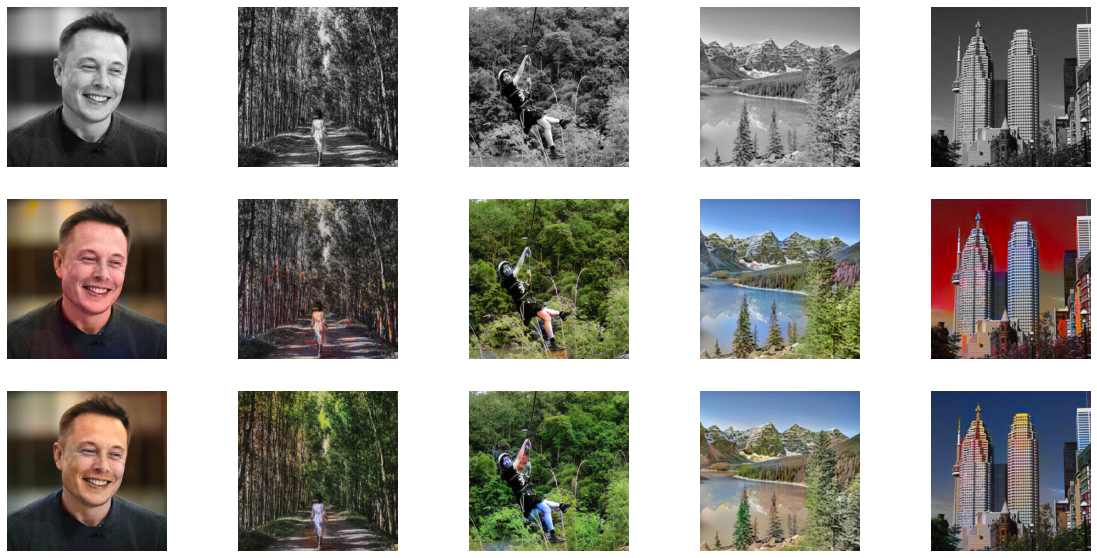

In [ ]:
fig = plt.figure(figsize=(20, 10))

for i in range(5):
  ax = plt.subplot(3, 5, i + 1)
  ax.imshow(tensors[i][0].cpu(), cmap="gray")
  ax.axis("off")
  ax = plt.subplot(3, 5, i + 1 + 5)
  ax.imshow(prediction_imgs[i])
  ax.axis("off")
  ax = plt.subplot(3, 5, i + 1 + 10)
  ax.imshow(prediction_imgs2[i])
  ax.axis("off")
  # ax = plt.subplot(3, 5, i + 1 + 10)
  # ax.imshow(labels[i])
  # ax.axis("off")

plt.show()

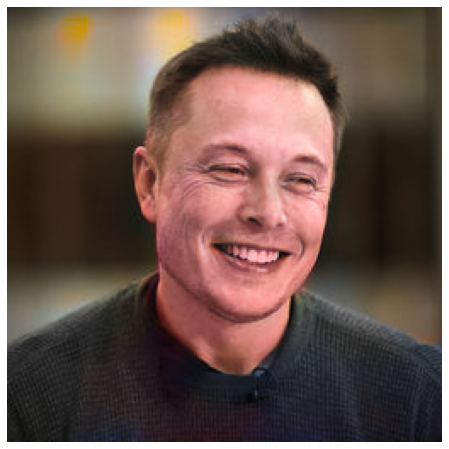

In [ ]:
img = Image.open("g1.png")

t = 2*(transforms.ToTensor()(img))[0] - 1
t = torch.unsqueeze(torch.unsqueeze(t, 0), 0).to(device)
ogan = G(t)

outimggan = lab_to_rgb(t, ogan.detach())[0]

plt.figure(figsize=(8, 8))
plt.axis("off")
plt.imshow(outimggan)

In [ ]:
z = (outimggan * 255).astype(np.uint8)
a = Image.fromarray(z, mode="RGB").save("res.jpg")

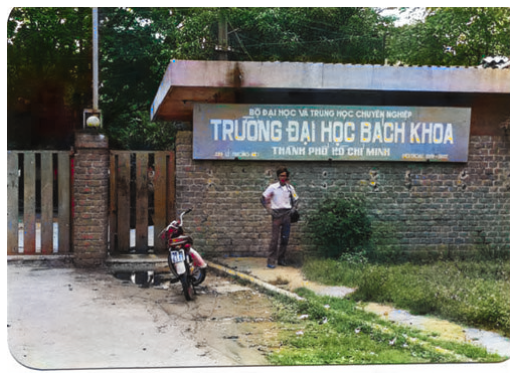

In [ ]:
img = Image.open("6a.jpg")

t = 2*(transforms.ToTensor()(img))[0] - 1
t = torch.unsqueeze(torch.unsqueeze(t, 0), 0).to(device)
ogan = G2(t)

outimggan = lab_to_rgb(t, ogan.detach())[0]

plt.figure(figsize=(9, 9))
plt.axis("off")
plt.imshow(outimggan)